In [4]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [5]:
# File Path
file_path = '/content/WELFake_Dataset.csv'

# Load dataset
df = pd.read_csv(file_path)

In [6]:
# View dataset
df

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
...,...,...,...,...
72129,72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0


In [7]:
# Checking Null Values
df.isnull().sum()

,0
Unnamed: 0,0
title,558
text,39
label,0


In [8]:
# Drop Null Value Row
df.dropna(inplace=True)

In [9]:
# Drop index column
df = df.drop(columns=['Unnamed: 0'], errors='ignore')

In [10]:
# View Again
df

,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1
...,...,...,...
72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0


In [11]:
df[df.duplicated()]

,title,text,label
873,Just Weeks After Obama’s Executive Order on Ca...,By Melissa Dykes This has already been the cra...,1
1192,Sports Bar Owner Bans NFL Games…Will Show Only...,"The owner of the Ringling Bar, located south o...",1
1508,HILARIOUS! LIBERALS STUNNED When Republican Gu...,"On Saturday, MSNBC s Joy Reid repeatedly attem...",1
1632,Strange: Trump ‘Internet Takeover’ Fear Story ...,21st Century Wire says A red flag went up when...,1
1661,WOW! HILLARY Took State Department Furniture T...,Most of the documents are testimonies provided...,1
...,...,...,...
72116,SAY “HELLO” TO YOUR NEW NEIGHBORS! Clooney Beg...,Karma it s a beautiful thing A massive makeshi...,1
72118,LEFTY MEDIA DESPERATELY Tries To Bury Trump Bu...,CNN political hack Alison Camarota wants to na...,1
72125,WOW! JILL STEIN’S ‘FIRESIDE CHAT’ Exposes Her ...,,1
72128,JUDGE JEANINE SOUNDS FREE SPEECH ALARM: “They ...,Judge Jeanine lets it rip! She s concerned wit...,1


In [12]:
final_sum = df['label'].sum()
final_sum

np.int64(36509)

**Mean**

In [13]:
# Findinmg Mean Value
mean_value = df['label'].mean()
mean_value

np.float64(0.5103512867467185)

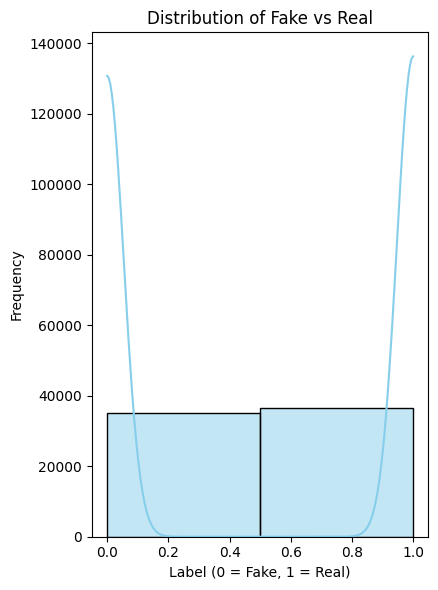

In [14]:
# Create a figure and subplots
plt.figure(figsize=(8, 6))

# Subplot for Distribution (Histogram + KDE)
plt.subplot(1, 2, 1)
sns.histplot(df['label'], kde=True, bins=2, color='skyblue')
plt.title('Distribution of Fake vs Real')
plt.xlabel('Label (0 = Fake, 1 = Real)')
plt.ylabel('Frequency')

# Show the plot
plt.tight_layout()
plt.show()

**Standard Deviation**

In [15]:
standard_deviation = df['label'].std()
standard_deviation

0.4998963333618355

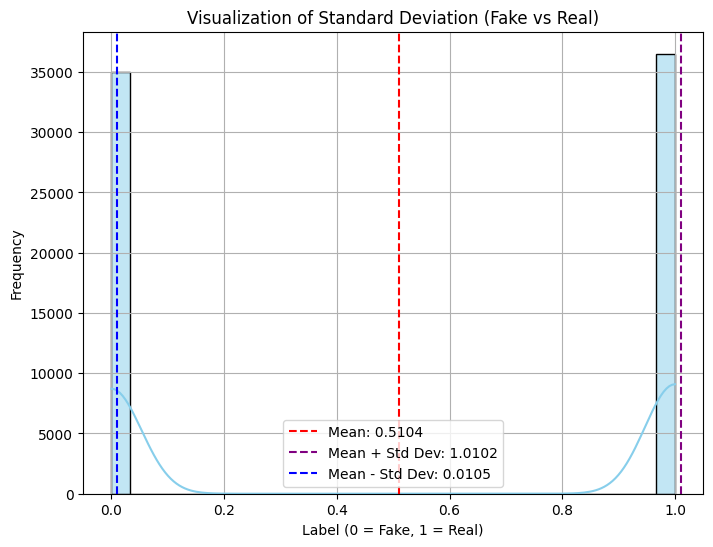

In [16]:
# Create a figure and axis
plt.figure(figsize=(8, 6))

# Plotting the histogram with standard deviation
sns.histplot(df['label'], kde=True, bins=30, color='skyblue')

# Adding lines for the standard deviation
plt.axvline(df['label'].mean(), color='red', linestyle='--', label=f'Mean: {df["label"].mean():.4f}')
plt.axvline(df['label'].mean() + standard_deviation, color='purple', linestyle='--', label=f'Mean + Std Dev: {df["label"].mean() + standard_deviation:.4f}')
plt.axvline(df['label'].mean() - standard_deviation, color='blue', linestyle='--', label=f'Mean - Std Dev: {df["label"].mean() - standard_deviation:.4f}')

# Adding labels and title
plt.title('Visualization of Standard Deviation (Fake vs Real)')
plt.xlabel('Label (0 = Fake, 1 = Real)')
plt.ylabel('Frequency')

# Displaying the plot with legends
plt.legend()
plt.grid(True)
plt.show()

**Skewness**

In [17]:
skewness = df['label'].skew()
skewness

np.float64(-0.041414891291224575)

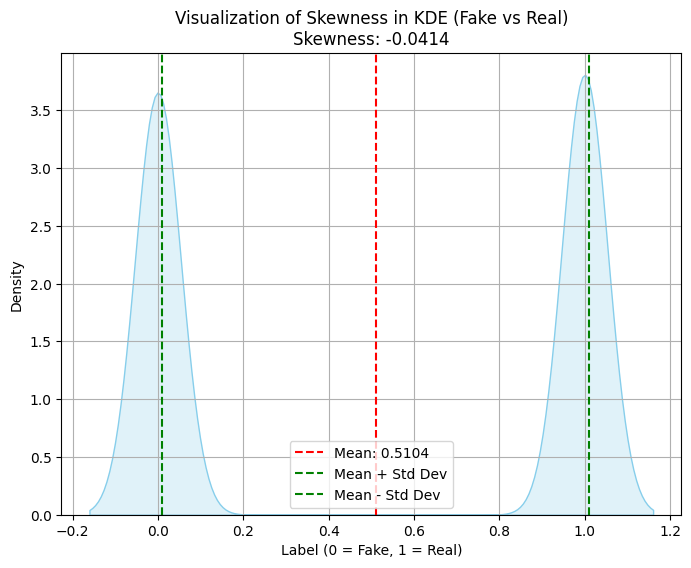

In [18]:
# Create a figure and axis
plt.figure(figsize=(8, 6))

# Plotting the KDE with skewness
sns.kdeplot(df['label'], fill=True, color='skyblue')

# Adding lines to show mean and skewness effects
plt.axvline(df['label'].mean(), color='red', linestyle='--', label=f'Mean: {df["label"].mean():.4f}')
plt.axvline(df['label'].mean() + df['label'].std(), color='green', linestyle='--', label=f'Mean + Std Dev')
plt.axvline(df['label'].mean() - df['label'].std(), color='green', linestyle='--', label=f'Mean - Std Dev')

# Adding labels and title
plt.title(f'Visualization of Skewness in KDE (Fake vs Real)\nSkewness: {df["label"].skew():.4f}')
plt.xlabel('Label (0 = Fake, 1 = Real)')
plt.ylabel('Density')

# Displaying the plot with legend
plt.legend()
plt.grid(True)
plt.show()

**Kurtosis**

In [19]:
final_kurtosis = df['label'].kurtosis()
final_kurtosis

np.float64(-1.998340676291197)

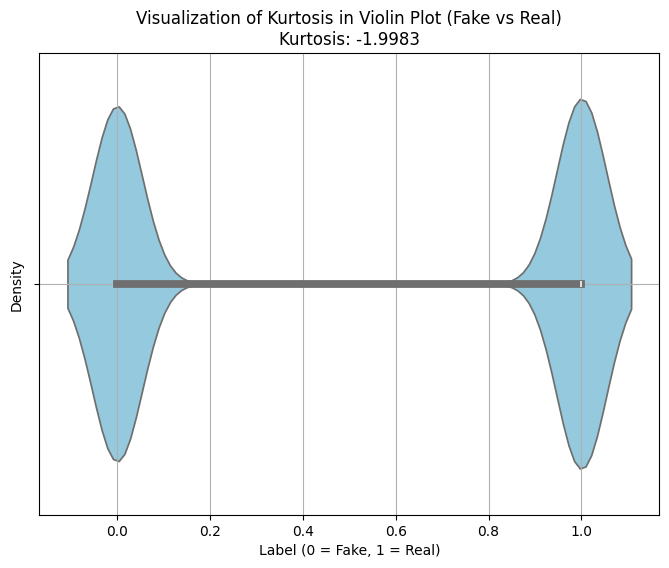

In [20]:
# Create a figure and axis
plt.figure(figsize=(8, 6))

# Plotting the violin plot for the 'label' column
sns.violinplot(x=df['label'], color='skyblue')

# Adding labels and title
plt.title(f'Visualization of Kurtosis in Violin Plot (Fake vs Real)\nKurtosis: {df["label"].kurtosis():.4f}')
plt.xlabel('Label (0 = Fake, 1 = Real)')
plt.ylabel('Density')

# Displaying the plot
plt.grid(True)
plt.show()

**Data Preprocessing**

In [21]:
# Preprocessing: Tokenize the text
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(df['text'])
X = tokenizer.texts_to_sequences(df['text'])

In [22]:
# Pad sequences for uniform input size
X = pad_sequences(X, maxlen=200)

# Labels
y = df['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**LSTM Model**

In [23]:
# LSTM Model
lstm_model = Sequential()

# Embedding layer (Word embeddings)
lstm_model.add(Embedding(input_dim=10000, output_dim=128, input_length=200))

# LSTM layer
lstm_model.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2))

# Fully connected layer
lstm_model.add(Dense(1, activation='sigmoid'))

# Compile the model
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the LSTM model
lstm_history = lstm_model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
895/895 ━━━━━━━━━━━━━━━━━━━━ 608s 674ms/step - accuracy: 0.8708 - loss: 0.3084 - val_accuracy: 0.9235 - val_loss: 0.2350
Epoch 2/5
895/895 ━━━━━━━━━━━━━━━━━━━━ 662s 740ms/step - accuracy: 0.9300 - loss: 0.1795 - val_accuracy: 0.9240 - val_loss: 0.2039
Epoch 3/5
895/895 ━━━━━━━━━━━━━━━━━━━━ 667s 723ms/step - accuracy: 0.9587 - loss: 0.1178 - val_accuracy: 0.9546 - val_loss: 0.1363
Epoch 4/5
895/895 ━━━━━━━━━━━━━━━━━━━━ 688s 729ms/step - accuracy: 0.9699 - loss: 0.0873 - val_accuracy: 0.9539 - val_loss: 0.1494
Epoch 5/5
895/895 ━━━━━━━━━━━━━━━━━━━━ 680s 728ms/step - accuracy: 0.9807 - loss: 0.0607 - val_accuracy: 0.9564 - val_loss: 0.1505


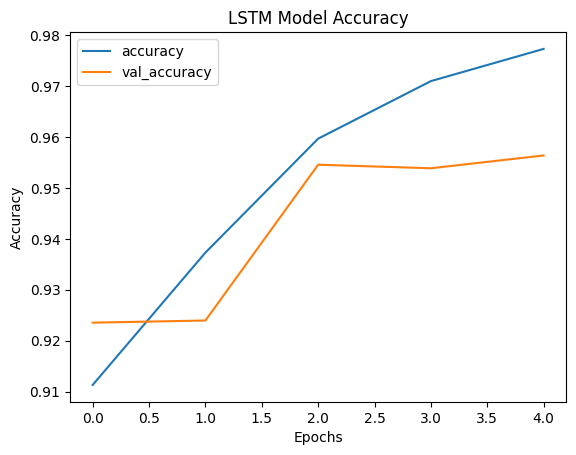

In [24]:
# Plot the training history
plt.plot(lstm_history.history['accuracy'], label='accuracy')
plt.plot(lstm_history.history['val_accuracy'], label='val_accuracy')
plt.title('LSTM Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**CNN Model**

In [25]:
# CNN Model
cnn_model = Sequential()

# Embedding layer
cnn_model.add(Embedding(input_dim=10000, output_dim=128, input_length=200))

# 1D Convolutional layer
cnn_model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))

# Max pooling layer
cnn_model.add(MaxPooling1D(pool_size=2))

# Flatten layer
cnn_model.add(Flatten())

# Fully connected layer
cnn_model.add(Dense(1, activation='sigmoid'))

# Compile the model
cnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the CNN model
cnn_history = cnn_model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/5
895/895 ━━━━━━━━━━━━━━━━━━━━ 108s 118ms/step - accuracy: 0.8616 - loss: 0.2800 - val_accuracy: 0.9611 - val_loss: 0.1127
Epoch 2/5
895/895 ━━━━━━━━━━━━━━━━━━━━ 104s 116ms/step - accuracy: 0.9837 - loss: 0.0506 - val_accuracy: 0.9653 - val_loss: 0.1158
Epoch 3/5
895/895 ━━━━━━━━━━━━━━━━━━━━ 142s 116ms/step - accuracy: 0.9964 - loss: 0.0140 - val_accuracy: 0.9628 - val_loss: 0.1679
Epoch 4/5
895/895 ━━━━━━━━━━━━━━━━━━━━ 142s 116ms/step - accuracy: 0.9991 - loss: 0.0042 - val_accuracy: 0.9600 - val_loss: 0.2004
Epoch 5/5
895/895 ━━━━━━━━━━━━━━━━━━━━ 142s 116ms/step - accuracy: 0.9999 - loss: 0.0022 - val_accuracy: 0.9653 - val_loss: 0.2182


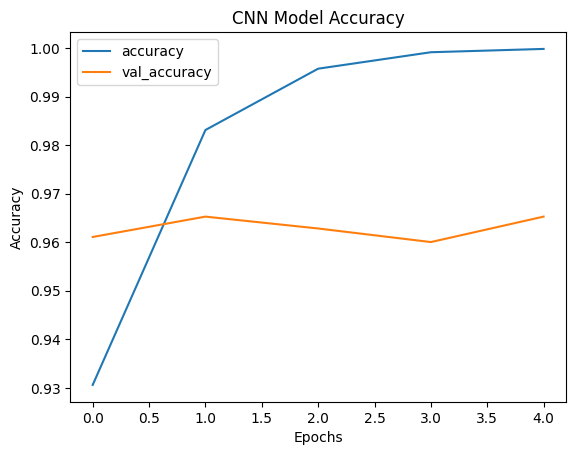

In [26]:
# Plot the training history
plt.plot(cnn_history.history['accuracy'], label='accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='val_accuracy')
plt.title('CNN Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Evaluation**

In [28]:
# Evaluate the models
lstm_score = lstm_model.evaluate(X_test, y_test)
cnn_score = cnn_model.evaluate(X_test, y_test)

print("LSTM Accuracy: ", lstm_score[1])
print("CNN Accuracy: ", cnn_score[1])

448/448 ━━━━━━━━━━━━━━━━━━━━ 76s 166ms/step - accuracy: 0.8913 - loss: 0.2644
448/448 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9645 - loss: 0.2138
LSTM Accuracy:  0.8919485807418823
CNN Accuracy:  0.9652642011642456


In [29]:
# Save the LSTM model
lstm_model.save('/content/lstm_model.h5')

# Save the CNN model
cnn_model.save('/content/cnn_model.h5')

**Model Improvement**

In [30]:
from tensorflow.keras.layers import Bidirectional, Dropout
from tensorflow.keras.optimizers import Adam

# Updated LSTM Model with Bidirectional, Dropout, and Learning Rate Scheduling
lstm_model = Sequential()

# Embedding layer
lstm_model.add(Embedding(input_dim=10000, output_dim=128, input_length=200))

# Bidirectional LSTM layer
lstm_model.add(Bidirectional(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2)))

# Dropout layer for regularization
lstm_model.add(Dropout(0.5))

# Fully connected layer
lstm_model.add(Dense(1, activation='sigmoid'))

# Compile the model with Adam optimizer
optimizer = Adam(learning_rate=0.001)
lstm_model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Train the LSTM model
lstm_history = lstm_model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/5
895/895 ━━━━━━━━━━━━━━━━━━━━ 1232s 1s/step - accuracy: 0.8627 - loss: 0.3147 - val_accuracy: 0.9346 - val_loss: 0.1700
Epoch 2/5
895/895 ━━━━━━━━━━━━━━━━━━━━ 1310s 1s/step - accuracy: 0.9379 - loss: 0.1744 - val_accuracy: 0.9217 - val_loss: 0.1968
Epoch 3/5
895/895 ━━━━━━━━━━━━━━━━━━━━ 1237s 1s/step - accuracy: 0.9545 - loss: 0.1258 - val_accuracy: 0.9396 - val_loss: 0.1586
Epoch 4/5
895/895 ━━━━━━━━━━━━━━━━━━━━ 1274s 1s/step - accuracy: 0.9722 - loss: 0.0811 - val_accuracy: 0.9537 - val_loss: 0.1420
Epoch 5/5
895/895 ━━━━━━━━━━━━━━━━━━━━ 1281s 1s/step - accuracy: 0.9794 - loss: 0.0585 - val_accuracy: 0.9569 - val_loss: 0.1526


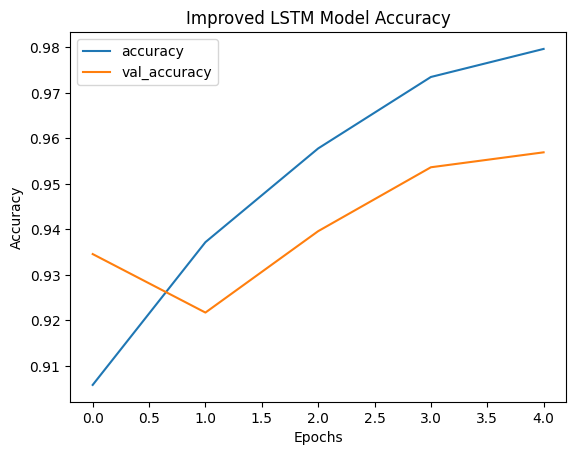

In [31]:
# Plot the training history
plt.plot(lstm_history.history['accuracy'], label='accuracy')
plt.plot(lstm_history.history['val_accuracy'], label='val_accuracy')
plt.title('Improved LSTM Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [32]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout

# Updated CNN Model with Dropout and Early Stopping
cnn_model = Sequential()

# Embedding layer
cnn_model.add(Embedding(input_dim=10000, output_dim=128, input_length=200))

# 1D Convolutional layer
cnn_model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))

# Max pooling layer
cnn_model.add(MaxPooling1D(pool_size=2))

# Dropout regularization
cnn_model.add(Dropout(0.5))

# Flatten layer
cnn_model.add(Flatten())

# Fully connected layer
cnn_model.add(Dense(1, activation='sigmoid'))

# Compile the model
cnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the CNN model with early stopping
cnn_history = cnn_model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stopping])


Epoch 1/5
895/895 ━━━━━━━━━━━━━━━━━━━━ 110s 120ms/step - accuracy: 0.8444 - loss: 0.3049 - val_accuracy: 0.9578 - val_loss: 0.1219
Epoch 2/5
895/895 ━━━━━━━━━━━━━━━━━━━━ 140s 118ms/step - accuracy: 0.9778 - loss: 0.0663 - val_accuracy: 0.9608 - val_loss: 0.1139
Epoch 3/5
895/895 ━━━━━━━━━━━━━━━━━━━━ 105s 118ms/step - accuracy: 0.9924 - loss: 0.0257 - val_accuracy: 0.9623 - val_loss: 0.1430
Epoch 4/5
895/895 ━━━━━━━━━━━━━━━━━━━━ 106s 118ms/step - accuracy: 0.9966 - loss: 0.0124 - val_accuracy: 0.9627 - val_loss: 0.1621
Epoch 5/5
895/895 ━━━━━━━━━━━━━━━━━━━━ 142s 118ms/step - accuracy: 0.9976 - loss: 0.0078 - val_accuracy: 0.9633 - val_loss: 0.2014


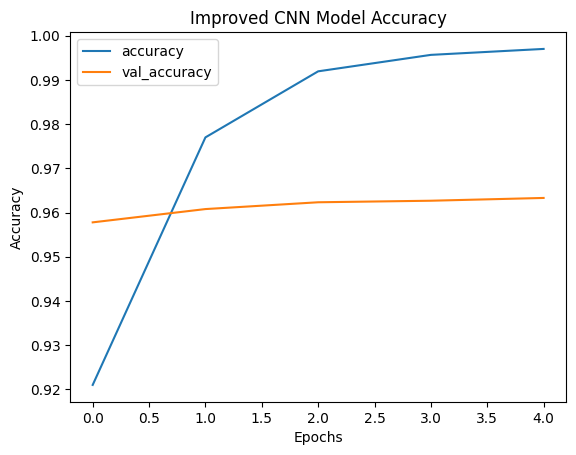

In [33]:
# Plot the training history
plt.plot(cnn_history.history['accuracy'], label='accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='val_accuracy')
plt.title('Improved CNN Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [34]:
# Evaluate the models
lstm_score = lstm_model.evaluate(X_test, y_test)
cnn_score = cnn_model.evaluate(X_test, y_test)

print("LSTM Accuracy: ", lstm_score[1])
print("CNN Accuracy: ", cnn_score[1])

448/448 ━━━━━━━━━━━━━━━━━━━━ 71s 158ms/step - accuracy: 0.9570 - loss: 0.1495
448/448 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9591 - loss: 0.1132
LSTM Accuracy:  0.9569471478462219
CNN Accuracy:  0.9607911705970764


**Save Models**

In [35]:
# Save the LSTM model
lstm_model.save('/content/lstm_model.h5')

# Save the CNN model
cnn_model.save('/content/cnn_model.h5')